In [26]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('Movie.csv', header = 0)
# missing values 
df['Time_taken'].fillna(value = df['Time_taken'].mean(), inplace = True)
# dummies 
df = pd.get_dummies(df, columns=['3D_available', 'Genre'], drop_first=True)
# split 
X = df.loc[:, df.columns!='Start_Tech_Oscar']
y = df['Start_Tech_Oscar']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Bagging

In [4]:
from sklearn import tree 
clftree = tree.DecisionTreeClassifier()

In [5]:
from sklearn.ensemble import BaggingClassifier

In [6]:
bag_clf = BaggingClassifier(clftree, n_estimators=1000, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)

In [8]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=1000, n_jobs=-1, random_state=0)

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [10]:
confusion_matrix(y_test, bag_clf.predict(X_test))

array([[26, 18],
       [19, 39]], dtype=int64)

In [11]:
accuracy_score(y_test, bag_clf.predict(X_test))

0.6372549019607843

# Random forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
rf_lcf = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=0)

In [14]:
rf_lcf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=0)

In [15]:
confusion_matrix(y_test, rf_lcf.predict(X_test))

array([[25, 19],
       [19, 39]], dtype=int64)

In [16]:
accuracy_score(y_test, rf_lcf.predict(X_test))

0.6274509803921569

## CV grid search to get best params for RF

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
rf_lcf2 = RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=0)

In [19]:
params_grid = {'max_features': [4, 5, 6], 'min_samples_split': [2, 3, 10]}

In [20]:
grid_search = GridSearchCV(rf_lcf2, params_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [21]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=300, n_jobs=-1,
                                              random_state=0),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                          15, 16, 17, 18, 19, 20],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy')

In [22]:
grid_search.best_params_

{'max_features': 13, 'min_samples_split': 2}

In [23]:
cvrf_lcf = grid_search.best_estimator_

In [24]:
accuracy_score(y_test, cvrf_lcf.predict(X_test))

0.6372549019607843

In [25]:
confusion_matrix(y_test, cvrf_lcf.predict(X_test))

array([[26, 18],
       [19, 39]], dtype=int64)

# Boosting

# Gradient Boost

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

In [36]:
glb_clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.02, max_depth=1, random_state=0)
glb_clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=1000,
                           random_state=0)

In [37]:
accuracy_score(y_test, glb_clf.predict(X_test))

0.6176470588235294

grid search

In [42]:
glb_clf2 = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.02, max_depth=1, random_state=0)

In [43]:
params_grid2 = {'learning_rate': [0.01, 0.02, 0.05], 'max_depth': [1, 2, 3]}

In [48]:
grid_search_glb = GridSearchCV(glb_clf2, params_grid2, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_glb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=0.02,
                                                  max_depth=1,
                                                  n_estimators=1000,
                                                  random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.05],
                         'max_depth': [1, 2, 3]},
             scoring='accuracy')

In [50]:
glb_clf_best = grid_search_glb.best_estimator_

In [51]:
accuracy_score(y_test, glb_clf_best.predict(X_test))

0.6176470588235294

# Ada boost

In [52]:
from sklearn.ensemble import AdaBoostClassifier

In [60]:
ada_clf = AdaBoostClassifier(base_estimator= rf_lcf, n_estimators=1000, learning_rate=0.02, random_state=0)

In [61]:
ada_clf.fit(X_train, y_train)

c:\Python3.9\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=1000,
                                                         n_jobs=-1,
                                                         random_state=0),
                   learning_rate=0.02, n_estimators=1000, random_state=0)

In [62]:
accuracy_score(y_test, ada_clf.predict(X_test))

0.6176470588235294

# XG boost

In [63]:
import xgboost as xgb

In [70]:
xgb_clf = xgb.XGBClassifier(n_estimators=1000, learning_rate=0.01, max_depth=1, random_state=0)

In [71]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [72]:
accuracy_score(y_test, xgb_clf.predict(X_test))

0.5980392156862745

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

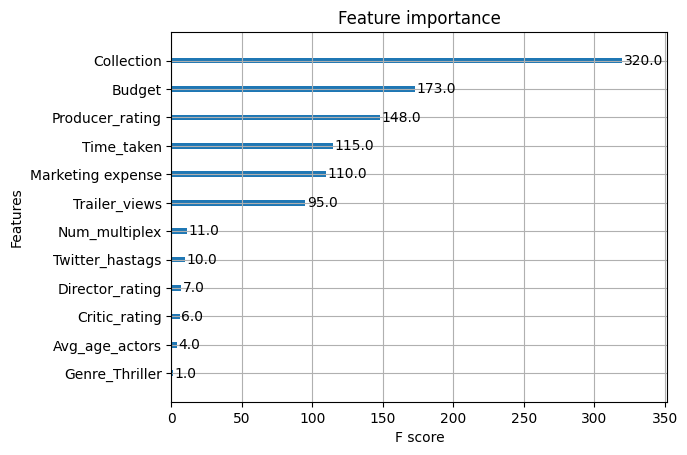

In [75]:
xgb.plot_importance(xgb_clf)

grid search

In [76]:
params_grid3 = {
    'max_depth': [1, 2, 3],
    'gamma': [0.01, 0.1, 1],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7, 1],
    'reg_alpha': [0, 0.01, 0.1],
}

gamma and reg_alpha are L2 and L1 regularisations

gamma controls the complexity of the tree model by determining how sensitive it is to the reduction in loss function. A higher gamma value leads to a simpler model with fewer splits, while a lower gamma value leads to a more complex model with more splits.

In [77]:
grid_search3 = GridSearchCV(xgb_clf, params_grid3, cv=5, scoring='accuracy', n_jobs=-1)

In [78]:
grid_search3.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.01,...
                                     max_delta_step=None, max_depth=1,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=1000, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.7, 1],
                         'gamma': [0.01, 0.1, 1], 'max_depth': [1, 2, 3],
                         'reg_alpha': [0, 0.01, 0.1],
                         'subsample': [0.5, 0.7, 1]},
             scoring='accuracy')

In [79]:
xgb_clf_best = grid_search3.best_estimator_

In [80]:
accuracy_score(y_test, xgb_clf_best.predict(X_test))

0.6078431372549019